In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import nltk
import pickle
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy'])
stopwords = list_stopwords

In [16]:
stopwords[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [17]:
data = pd.read_csv("tweets-data/cleaned-data.csv")

In [18]:
data.head()

,conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1840534326746010071,Sun Sep 29 23:29:13 +0000 2024,0,ngantuk berat tarik selimut lagi,1840534326746010071,NaN,NaN,in,NaN,0,0,0,https://x.com/0XalinggaGibran/status/184053432...,1799405747102777345,0XalinggaGibran
1,1840534301370425845,Sun Sep 29 23:29:07 +0000 2024,0,mengakui akun fufufafa adalah miliknya dan mem...,1840534301370425845,NaN,gibran,in,NaN,0,0,0,https://x.com/ENS53311139/status/1840534301370...,1168102826624483329,ENS53311139
2,1840533996327120918,Sun Sep 29 23:27:54 +0000 2024,0,cc fyi pak prabowo harusnya bijaksana dalam m...,1840533996327120918,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://x.com/saerozi63/status/184053399632712...,1638596282012028930,saerozi63
3,1840172992380449177,Sun Sep 29 23:27:52 +0000 2024,0,fufufafa jadi wapress kalau pak prabowo ada s...,1840533986961179022,NaN,gtobing2903,in,Jogjakarta,0,0,0,https://x.com/yudhikura/status/184053398696117...,131352298,yudhikura
4,1840365370311594494,Sun Sep 29 23:26:57 +0000 2024,1,gibran jadi wapres di negeri dg 275jt penduduk...,1840533756303880359,NaN,HeryIdris5,in,"Kota Bogor, West Java",0,0,0,https://x.com/wong_clayten/status/184053375630...,3139555602,wong_clayten


In [19]:
data = data.Tweet.to_list()
data[:10]

['ngantuk berat tarik selimut lagi',
 'mengakui akun fufufafa adalah miliknya dan meminta maaf terkait saat itu masih muda hallooo bagaimana ini  dimaafkan tidak  dan bgmn apakah masih layak  memimpin nkri',
 'cc  fyi pak prabowo harusnya bijaksana dalam mengambil keputusan politik  perut rakyat gak bisa dibohongin pak  kalo laper bunyi lemes sakit pak  jgn dibohongin lagi dgn politik wakil jgn gibran apalagi puan  rakyat butuh hidup tenang adil sejahtera semoga aja',
 'fufufafa jadi wapress  kalau pak prabowo ada sakit dsb  yakin mau di pimpin fufufafa',
 'gibran jadi wapres di negeri dg 275jt penduduk saja sudah sangat aneh      siap2 5th ke depan menghadapi kelakuan pejabat dan aparat negara yg akan jauh lebih aneh lagi safam fufufafa',
 'pasukan bawah tanah jokowi yg melaporkan roy suryo sebut gibran lambang negara makanya harus di lindungi',
 'segera ganji gibran alias fufufafa',
 'bisnis cuci mencuci sepeinya kalau sudah kering pasti di angkat kalau sudah bersih sudah bereskan',


In [20]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data)

D:\Kuliah\Semester_5\Aplikasi_Web\code\Streamlit\.venv\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [21]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=true_k)
model.fit(X)

KMeans(max_iter=1000, n_clusters=3, n_init=3)

In [22]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 makanbergiziuntukbangsa
 prabowo
 makan
 program
 bergizi
 gibran
 terima
 kasih
 bangsa
 gratis

Cluster 1:
 anak
 makanbergiziuntukbangsa
 prabowo
 terima
 kasih
 sehat
 program
 gibran
 tumbuh
 kesehatan

Cluster 2:
 gibran
 fufufafa
 prabowo
 jokowi
 aja
 presiden
 gak
 nya
 si
 solo



In [23]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

np.float64(0.01576985012090575)

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

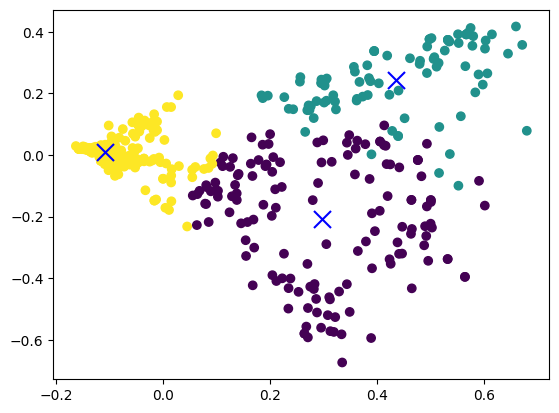

In [25]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')